### Exploratory Data Analysis: American Express Default Project


In this notebook, we will perform several techniques to explore the American Express dataset to understand the nature of the data, relationships between variables and distribution of the variables. Visualizations will be one of our main resources to discover insights that will help as foundations for the ML model to solve the business problem. 

##### Imports 

In [1]:
# imports
import os
from pathlib import Path

import requests
import numpy as np
import pandas as pd

from scipy.stats import median_abs_deviation
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import pandas_profiling
# from pandas_profiling.utils.cache import cache_file
# enabling widgets for pandas profiling 
!jupyter nbextension enable --py widgetsnbextension

Traceback (most recent call last):
  File "/Users/camilods16/opt/anaconda3/envs/sb/bin/jupyter-nbextension", line 10, in <module>
    sys.exit(main())
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/traitlets/config/application.py", line 978, in launch_instance
    app.start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/notebook/nbextensions.py", line 972, in start
    super().start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/jupyter_core/application.py", line 258, in start
    self.subapp.start()
  File "/Users/camilods16/opt/anaconda3/envs/sb/lib/python3.8/site-packages/notebook/nbextensions.py", line 882, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "/Users/camilods16/opt/anaco

#### Loading the data

In [2]:
# Loading data to variable amex_df_
amex_df_ = pd.read_csv(r'/Users/camilods16/Documents/Project-2-AmEx-Credit-Card-Default-/Project-2-AmEx-Credit-Card-Default-/data/processed/amex_clean_data.csv')

### Pandas Profile: American Express DataFrame

The pandas profiling package provides another way to explore the American Express dataset with a few lines of code. Below, I applied the profile_report() method which was assigned to a variable 'profile'. Then, I saved the file as PDF format and will be on github.

In [3]:
# implementing a profile with pandas_profiling package
# profile = amex_df_.profile_report(title='American Express - Pandas Profiling', sort='descending', html={'style':{'full_width': True}}, progress_bar=False)
# profile.to_file(output_file='AmEx_pandas_profiling.html')
# profile

### Visualization of Distributions & Outliers Exploration:
     - Cleanup -> it will be an ongoing process throughout the entire project stages
     - Numerical variables exploration
     - Categorical Variables exploration
     - Correlation Matrix 
          - Numerical
          - All variables
     - Outliers Exploration: 
          - Encapsulating separation of variables
          - IQR Method -> detecting outliers in numerical variables

##### - Cleanup

Renaming the credit limit used column and dropping a column that was created by mistake. 
Dropping unnecessary columns and replacing an observation in the gender variable. 

In [4]:
# Checking the shape of the dataframe once more.
amex_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               45528 non-null  int64  
 1   customer_id              45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 45528 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           45528 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45528 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45528 non-null  float64
 11  migrant_worker           45528 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [5]:
# Renaming column
amex_df_.rename(columns={'credit_limit_used(%)':'credit_limit_used_pctg'}, inplace=True)
amex_df_.head()

,Unnamed: 0,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,0,CST_115179,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,1,CST_121920,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,2,CST_109330,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,3,CST_128288,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,4,CST_151355,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [6]:
# checking the columns' names
amex_df_.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used_pctg',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [7]:
# dropping False column
amex_df_.drop(False, axis=1, inplace=True)


KeyError: '[False] not found in axis'

In [9]:
# verifying the columns are correct
amex_df_.columns

Index(['Unnamed: 0', 'customer_id', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used_pctg',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

We can see that there are still 2 values missing. We replaced the categorical missing values with mode in the previous notebook. The other two numerical missing variables will not be replaced just yet.

In [10]:
# Dropping customer_id column for exploration
customer_amex = amex_df_[['customer_id']]
amex_df_.drop('customer_id', axis=1, inplace=True)

In [11]:
# checking the df
amex_df_

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,45523,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,45524,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,45525,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,45526,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


#### -  Exploring numerical variables

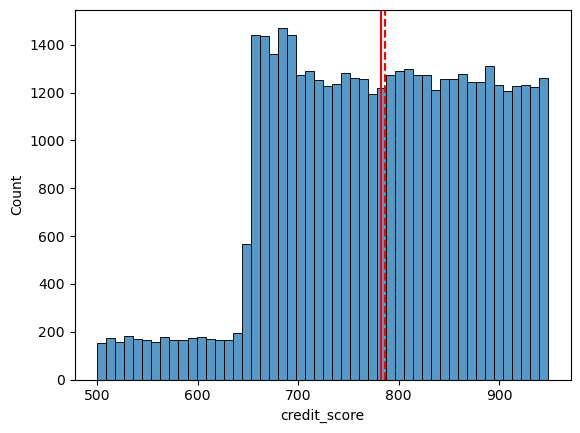

In [12]:
# Plotting the distribution of the two variables with missing values: credit_score
sns.histplot(data=amex_df_, x='credit_score')
plt.axvline(amex_df_['credit_score'].median(), color='r', linestyle='--')
plt.axvline(amex_df_['credit_score'].mean(), color='r', linestyle='-')
plt.show()

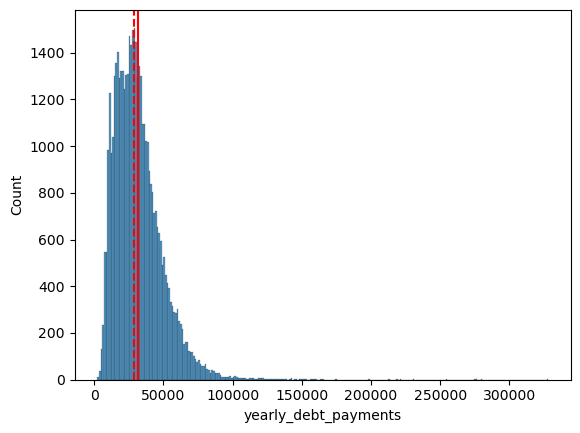

In [13]:
# Plotting the distribution of the two variables with missing values: 
sns.histplot(data=amex_df_, x='yearly_debt_payments')
plt.axvline(amex_df_['yearly_debt_payments'].median(), color='r', linestyle='--')
plt.axvline(amex_df_['yearly_debt_payments'].mean(), color='r', linestyle='-')
plt.show()

#### Exploring outliers by visualization


Creating a Boxplot of yearly_debt_payments to check for outliers

Text(0.5, 1.0, 'Yearly Debt Payments Outliers Exploration')

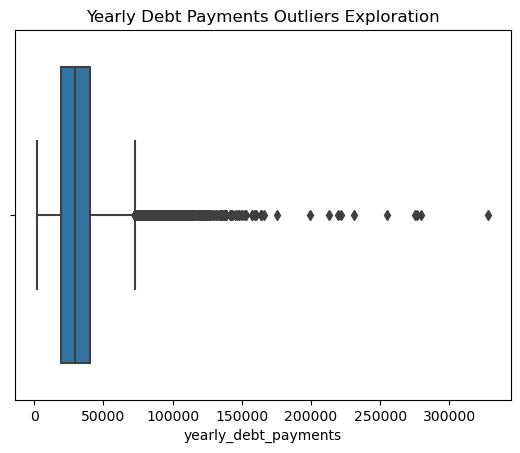

In [14]:
# Exploring outliers by creating a boxplot of the variable
sns.boxplot(data=amex_df_, x='yearly_debt_payments')
plt.title('Yearly Debt Payments Outliers Exploration')

Checking summary statistics of yearly debt payments

In [15]:
amex_df_[['yearly_debt_payments']].describe().T

,count,mean,std,min,25%,50%,75%,max
yearly_debt_payments,45433.0,31796.965311,17269.727234,2237.47,19231.14,29081.65,40561.15,328112.86


Checking summary statistics of credit_limit

In [16]:
# exploring credit_limit variable
amex_df_[['credit_limit']].describe().T

,count,mean,std,min,25%,50%,75%,max
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.805,35688.045,53435.7625,31129970.49


In [17]:
amex_df_[['credit_limit']].median()

credit_limit    35688.045
dtype: float64

Creating a boxplot of credit_limit to look for outliers

<AxesSubplot: xlabel='credit_limit'>

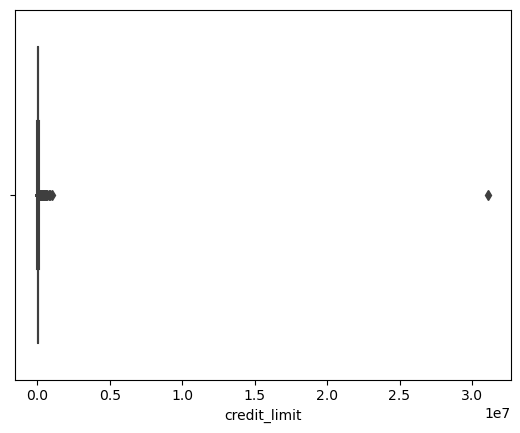

In [18]:
# checking outliers with a boxplot of credit_limit
sns.boxplot(data=amex_df_, x='credit_limit')

We are noticing there are extreme values which could be an error on data entry or, simply, this is reflecting the nature of the data. 

We will explore the observation by checking the maximum value to try to understand if there was a data entry error.

In [19]:
# checking the customer with the max value: yearly_debt_payments
amex_df_[amex_df_['yearly_debt_payments'] == max(amex_df_['yearly_debt_payments'])]

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
11888,11888,55,M,Y,N,2.0,834353.86,205.0,Managers,4.0,1.0,328112.86,332200.08,75,746.0,0,0,0


In [20]:
# checking the customer with the max value: credit limit
amex_df_[amex_df_['credit_limit'] == max(amex_df_['credit_limit'])]

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
26662,26662,51,F,N,Y,1.0,1.407590e+08,924.0,Laborers,3.0,0.0,32825.6,31129970.49,82,526.0,0,1,1


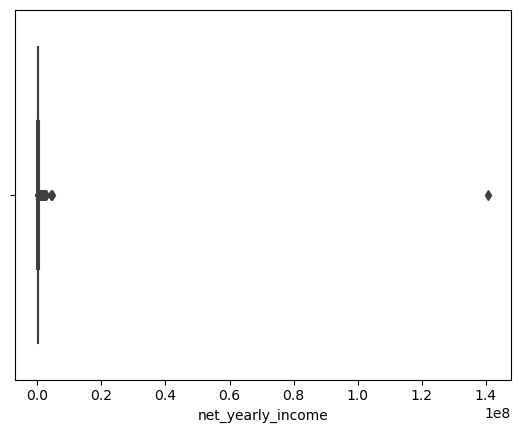

In [21]:
# Plotting of net_yearly_income: 
sns.boxplot(data=amex_df_, x='net_yearly_income')
plt.show()

### Visualizations of Categorical Variables 

Taking a look at the categorical variables using bar plots and count plots to understand

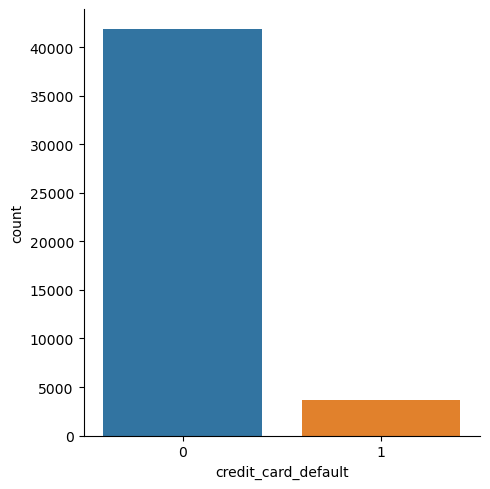

In [22]:
# bar plot of credit_card_default (target feature) and relationship with default_in_last_6months
sns.catplot(kind='count', data=amex_df_, x='credit_card_default')

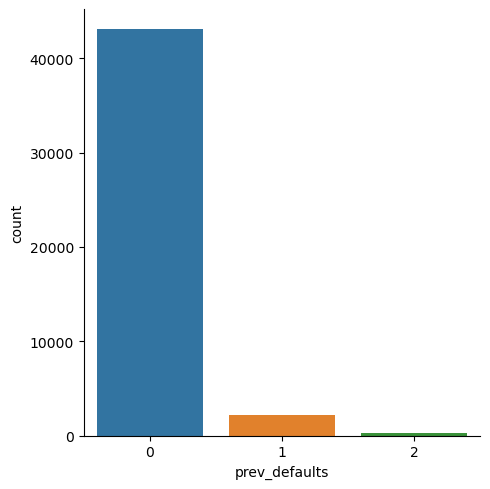

In [23]:
# bar plot of prev_defaults and relationship with credit_card_default
sns.catplot(kind='count', data=amex_df_, x='prev_defaults')

##### Visualizing the distribution of prev_defaults = 2

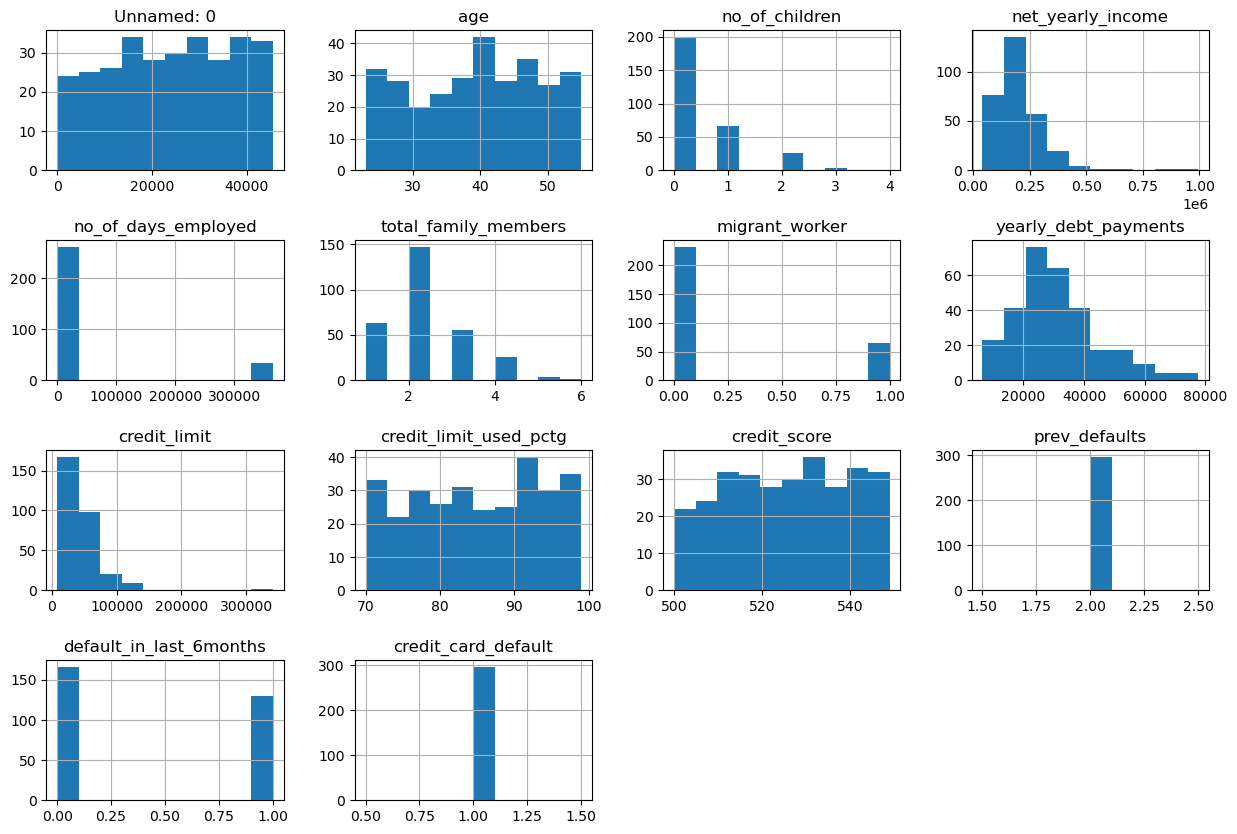

In [24]:
# distribution of a population sample with 2 previous defaults
amex_df_[amex_df_['prev_defaults']== 2].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Creating a barplot of net yearly income by occupation type

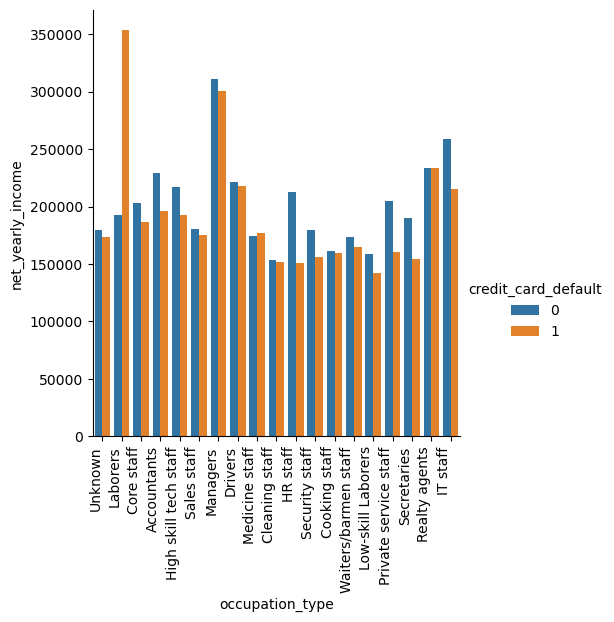

In [25]:
g = sns.catplot(x='occupation_type',
            data=amex_df_,
            y= 'net_yearly_income',
            hue='credit_card_default',
            kind='bar',
            errorbar=None
            )
g.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

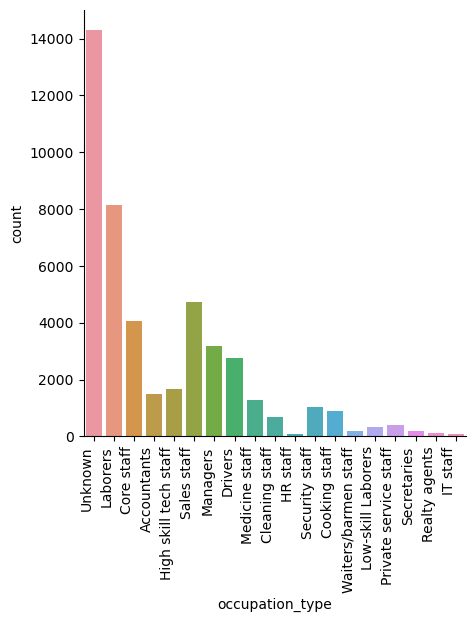

In [26]:
g = sns.catplot(x='occupation_type',
            data=amex_df_,
            kind='count'
            )
g.set_xticklabels(rotation=90, horizontalalignment='right')
plt.show()

In [27]:
# Grouping the dataframe by occupation type
occ_ccd = amex_df_.groupby('occupation_type')
occ_ccd.first()

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
occupation_type,,,,,,,,,,,,,,,,,
Accountants,5,46,F,Y,N,0.0,252765.91,2898.0,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
Cleaning staff,39,53,F,N,N,0.0,112168.78,2136.0,2.0,0.0,38577.08,23394.54,77,851.0,0,0,0
Cooking staff,108,27,F,N,N,0.0,141003.66,2371.0,2.0,1.0,15781.05,33616.31,28,682.0,0,0,0
Core staff,3,39,F,N,Y,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
Drivers,23,23,F,N,Y,2.0,217697.92,4057.0,4.0,0.0,27509.83,48384.25,84,519.0,2,0,1
HR staff,44,37,F,N,N,0.0,92260.01,4976.0,2.0,0.0,27946.64,26257.53,32,931.0,0,0,0
High skill tech staff,6,38,M,N,Y,1.0,262389.20,5541.0,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
IT staff,2414,38,M,Y,N,1.0,244700.14,229.0,2.0,1.0,32461.78,86976.11,93,733.0,0,0,0
Laborers,1,29,M,N,Y,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0


Creating a function to separate variables: categorical and numerical. This will make it easier to look for outliers using the IQR method.

In [28]:
# Function to separate values to explore outliers and relationships in both categorical, numerical
def separate_variables(data):
    # separating numerical data from df
    numerical_d = [i for i in amex_df_.columns if amex_df_[i].dtypes != 'object']
    numerical_d = amex_df_[numerical_d]
    # slicing dcategorical binary data from numerical data
    d_numerical = numerical_d[['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months']]
    # dropping above columns from numerical data
    numerical_d.drop(['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months'],axis=1,inplace=True)
    # separating categorical data from df
    categorical_d = [i for i in amex_df_.columns if amex_df_[i].dtype == 'object']
    categorical_d = amex_df_[categorical_d]
    # joining the categorical binary variables with categorical data
    categorical_d = pd.concat([categorical_d,d_numerical],axis=1)
    # returning numerical and categorical dfs
    return numerical_d, categorical_d

In [29]:
# separation of variables to look for outliers 
amex_numerical, amex_categorical = separate_variables(amex_df_)

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_50286/3259680766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_d.drop(['no_of_children','total_family_members','migrant_worker','prev_defaults','default_in_last_6months'],axis=1,inplace=True)


#### Cleanup Part II

Replacing 'XNA' gender for F as F is the mode. In later steps, these will be encoded into binary variables.

In [30]:
# checking categorical df columns
amex_categorical.columns

Index(['gender', 'owns_car', 'owns_house', 'occupation_type', 'no_of_children',
       'total_family_members', 'migrant_worker', 'prev_defaults',
       'default_in_last_6months'],
      dtype='object')

In [31]:
# replacing 'XNA' value with the most common gender in the dataset: F
amex_df_.loc[amex_df_['gender'] == 'XNA', 'gender'] = 'F'

In [32]:
amex_df_.gender.value_counts()

F    29958
M    15570
Name: gender, dtype: int64

#### Countplot of Total Family Members

Creating a countplot of the categorical variable

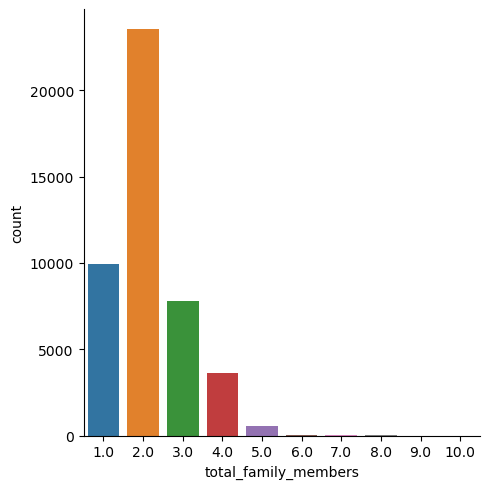

In [33]:
# Countplot of Total Family Members
g = sns.catplot(data=amex_categorical,
                x='total_family_members',
                kind='count')
g

In [34]:
# count of values of feature: total_family_members
amex_categorical['total_family_members'].value_counts(sort=False)

1.0      9913
2.0     23538
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
9.0         1
10.0        2
Name: total_family_members, dtype: int64

Looking for errors in the total family members variables by plotting a countplot and using value_counts to have a reference with the visualization.

#### Outliers Count & Processing

In [35]:
amex_numerical

,Unnamed: 0,age,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,credit_card_default
0,0,46,107934.04,612.0,33070.28,18690.93,73,544.0,1
1,1,29,109862.62,2771.0,15329.53,37745.19,52,857.0,0
2,2,37,230153.17,204.0,48416.60,41598.36,43,650.0,0
3,3,39,122325.82,11941.0,22574.36,32627.76,20,754.0,0
4,4,46,387286.00,1459.0,38282.95,52950.64,75,927.0,0
...,...,...,...,...,...,...,...,...,...
45523,45523,55,96207.57,117.0,11229.54,29663.83,82,907.0,0
45524,45524,31,383476.74,966.0,43369.91,139947.16,32,679.0,0
45525,45525,27,260052.18,1420.0,22707.51,83961.83,46,727.0,0
45526,45526,32,157363.04,2457.0,20150.10,25538.72,92,805.0,0


In [36]:
def detecting_outliers(numerical_value):
    """ Function to detect outliers in a given array"""
    values = numerical_value
    # Calculate the first and third quartiles
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # Identify outliers
    outliers = np.sum((values < lower_bound) | (values > upper_bound))
    return outliers

In [37]:
# Detecting outliers using IQR method in net_yearly_income of amex df:
inc_ = detecting_outliers(amex_numerical['net_yearly_income'])
print()
print('The number of outliers is: \n', inc_)


The number of outliers is: 
 1852


In [38]:
# Detecting outliers using IQR method in number of days employed:
emply_ = detecting_outliers(amex_numerical['no_of_days_employed'])
print()
print('The number of outliers is: \n', emply_)


The number of outliers is: 
 8351


In [39]:
# Detecting outliers using IQR method in yearly debt payments: 
debt_payments_ = detecting_outliers(amex_numerical['yearly_debt_payments'])
print()
print('The number of outliers is: \n', debt_payments_)


The number of outliers is: 
 1074


In [40]:
# Detecting outliers using IQR method in credit limit: 
credit_limit_out = detecting_outliers(amex_numerical['credit_limit'])
print()
print('The number of outliers is: \n', credit_limit_out)


The number of outliers is: 
 2003


In [41]:
# Detecting outliers using IQR method in credit score: 
credit_score = detecting_outliers(amex_numerical['credit_score'])
print()
print('The number of outliers is: \n', credit_score)


The number of outliers is: 
 0


#### Correlation Matrix: Heatmap

Creating a heatmap of a correlation matrix with numerical variables and with the entire dataset. In the first Matrix we can observe that credit_card_default, our target feature, has interesting correlations with the following numerical variables:
- credit_score: moderate negative relationship between the variables. 
- credit_limit_used: weak positive relationship between the variables. 

In the second Matrix, we can observe there are two more relationships that stick out from the average: 
- prev_defaults: strong positive relationship between the variables. 
- default_in_last_6months: strong positive relationship between the variables. 

Another interesting relationship is a strong positive correlation between credit limit and  net_yearly_income which makes sense and could be a feature to look for in the next steps of the project.

Text(0.5, 1.0, 'Heatmap Correlation Matrix Numerical Variables')

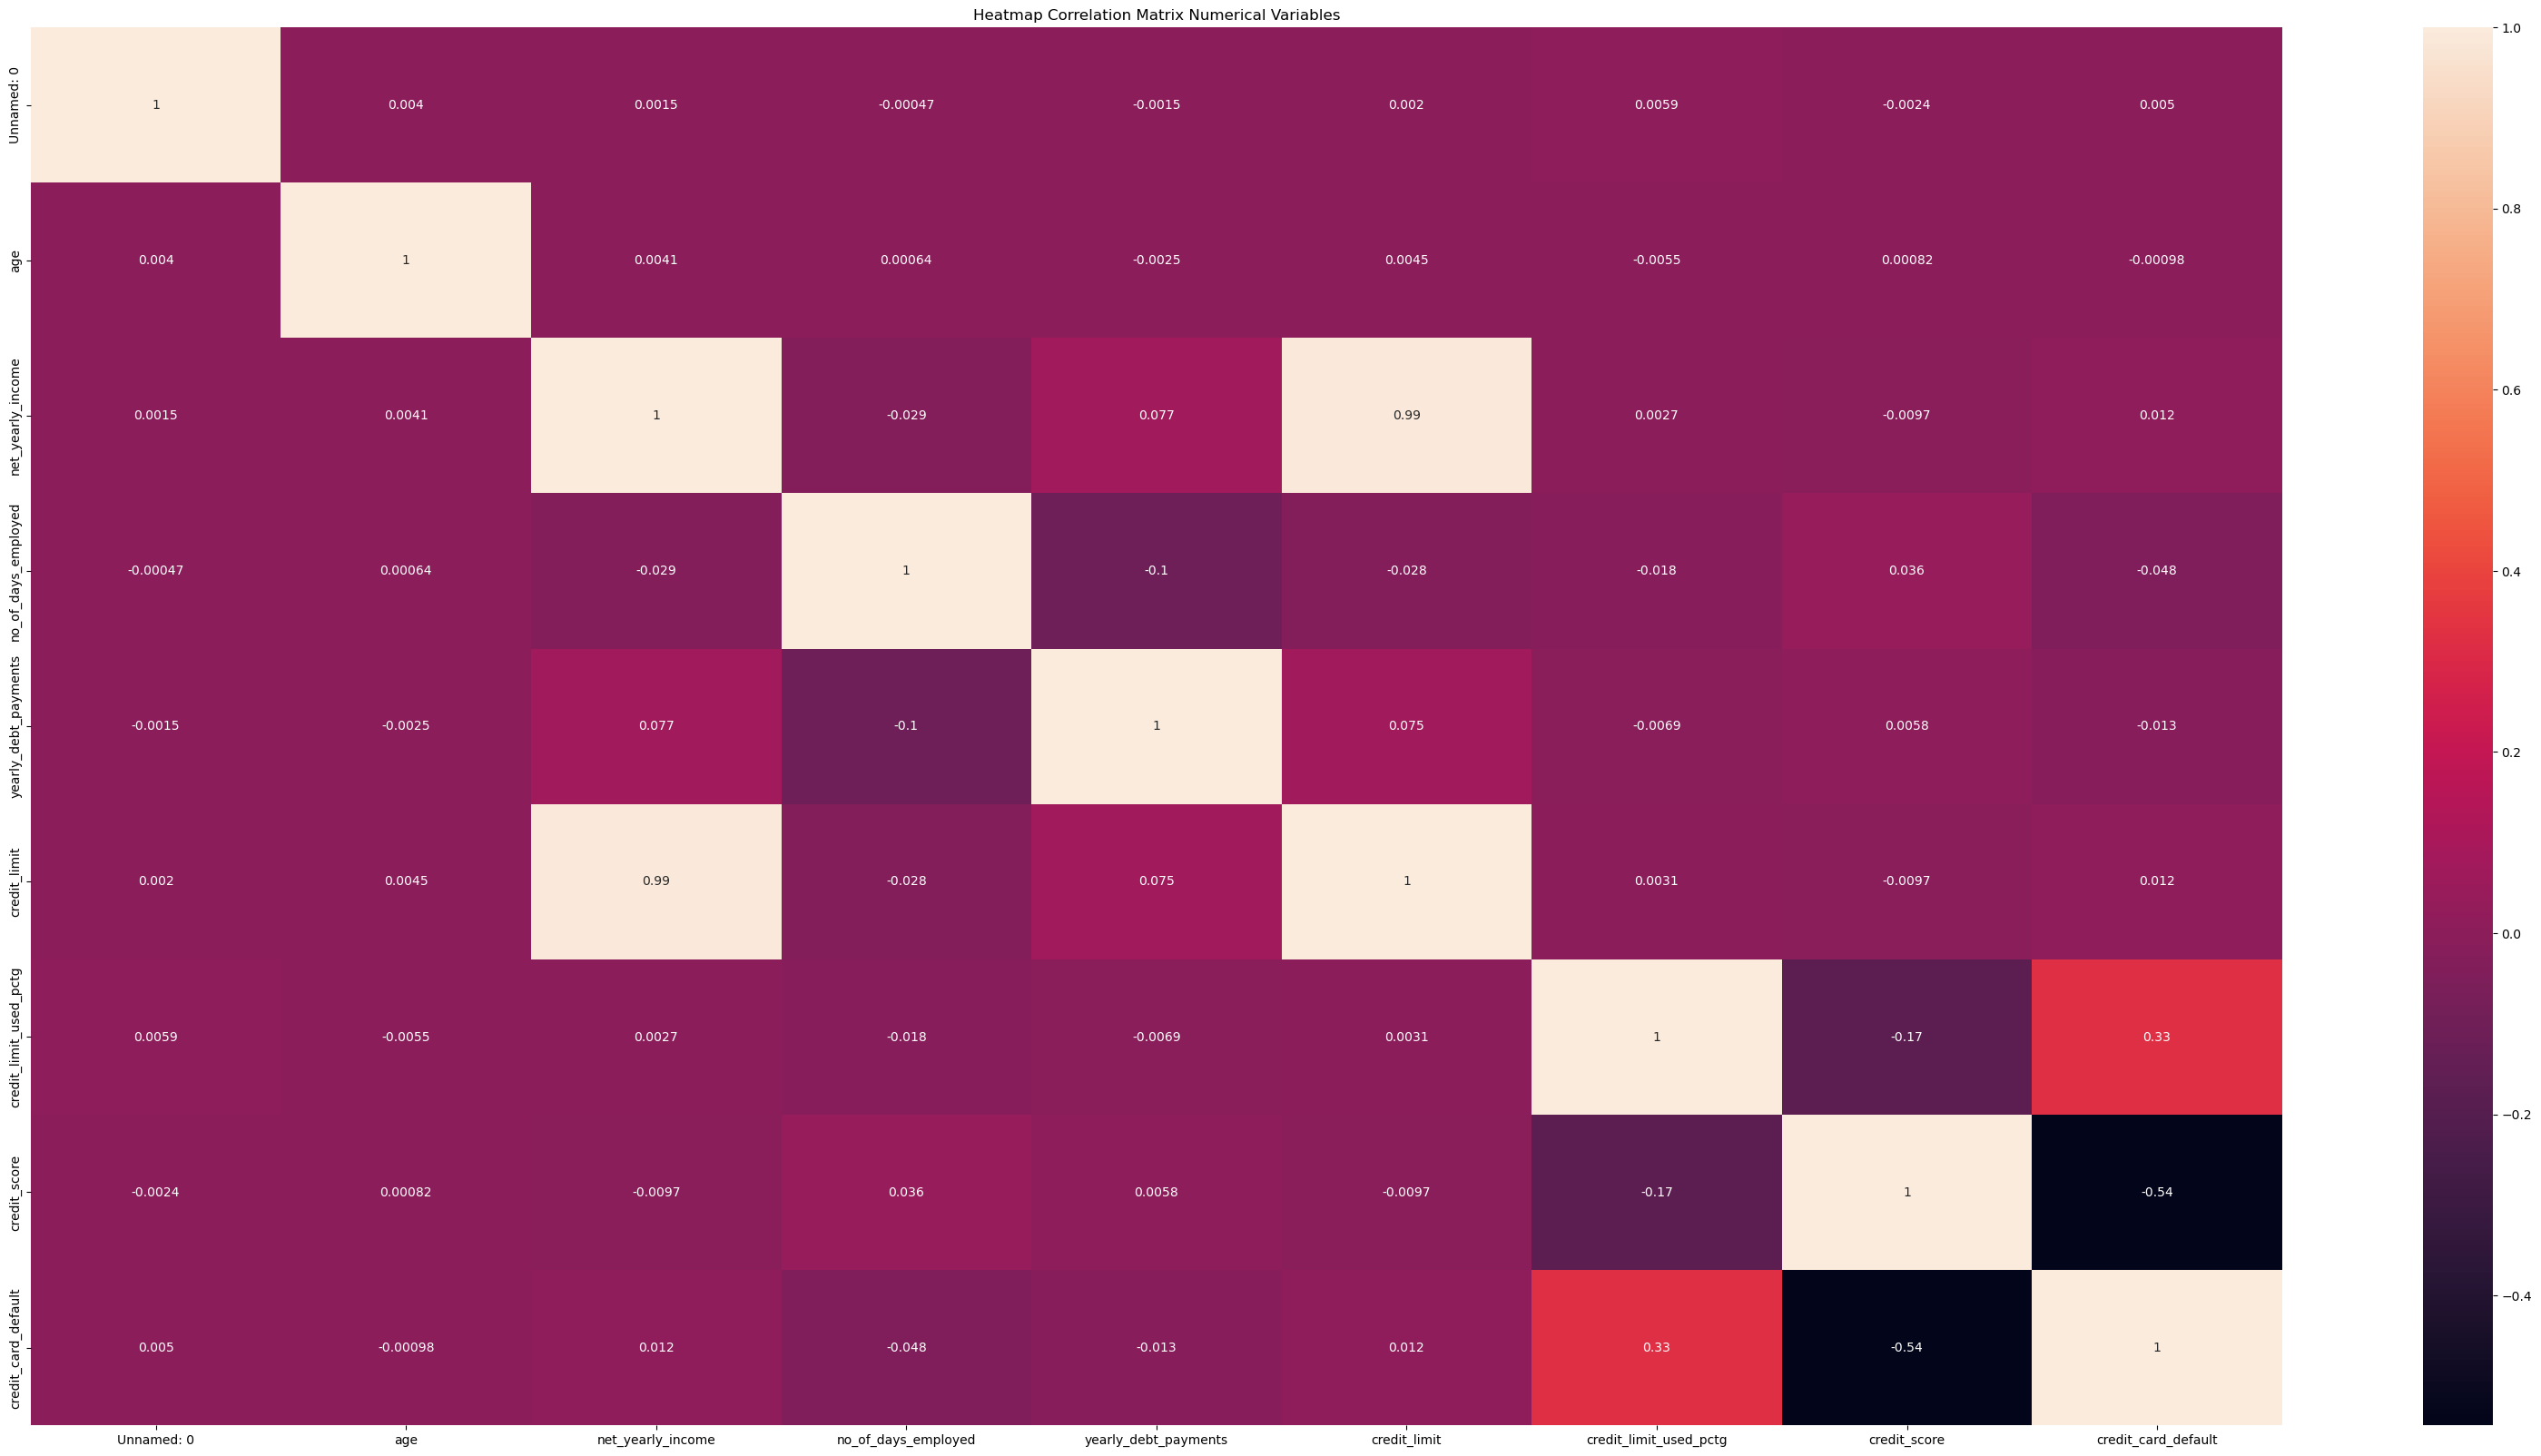

In [42]:

plt.figure(figsize=(40, 20))
sns.heatmap(amex_numerical.corr(), annot=True)
plt.title('Heatmap Correlation Matrix Numerical Variables')

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_50286/3205247524.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(amex_df_.corr(), annot=True)


Text(0.5, 1.0, 'Heatmap Matrix Correlation American Express Dataframe')

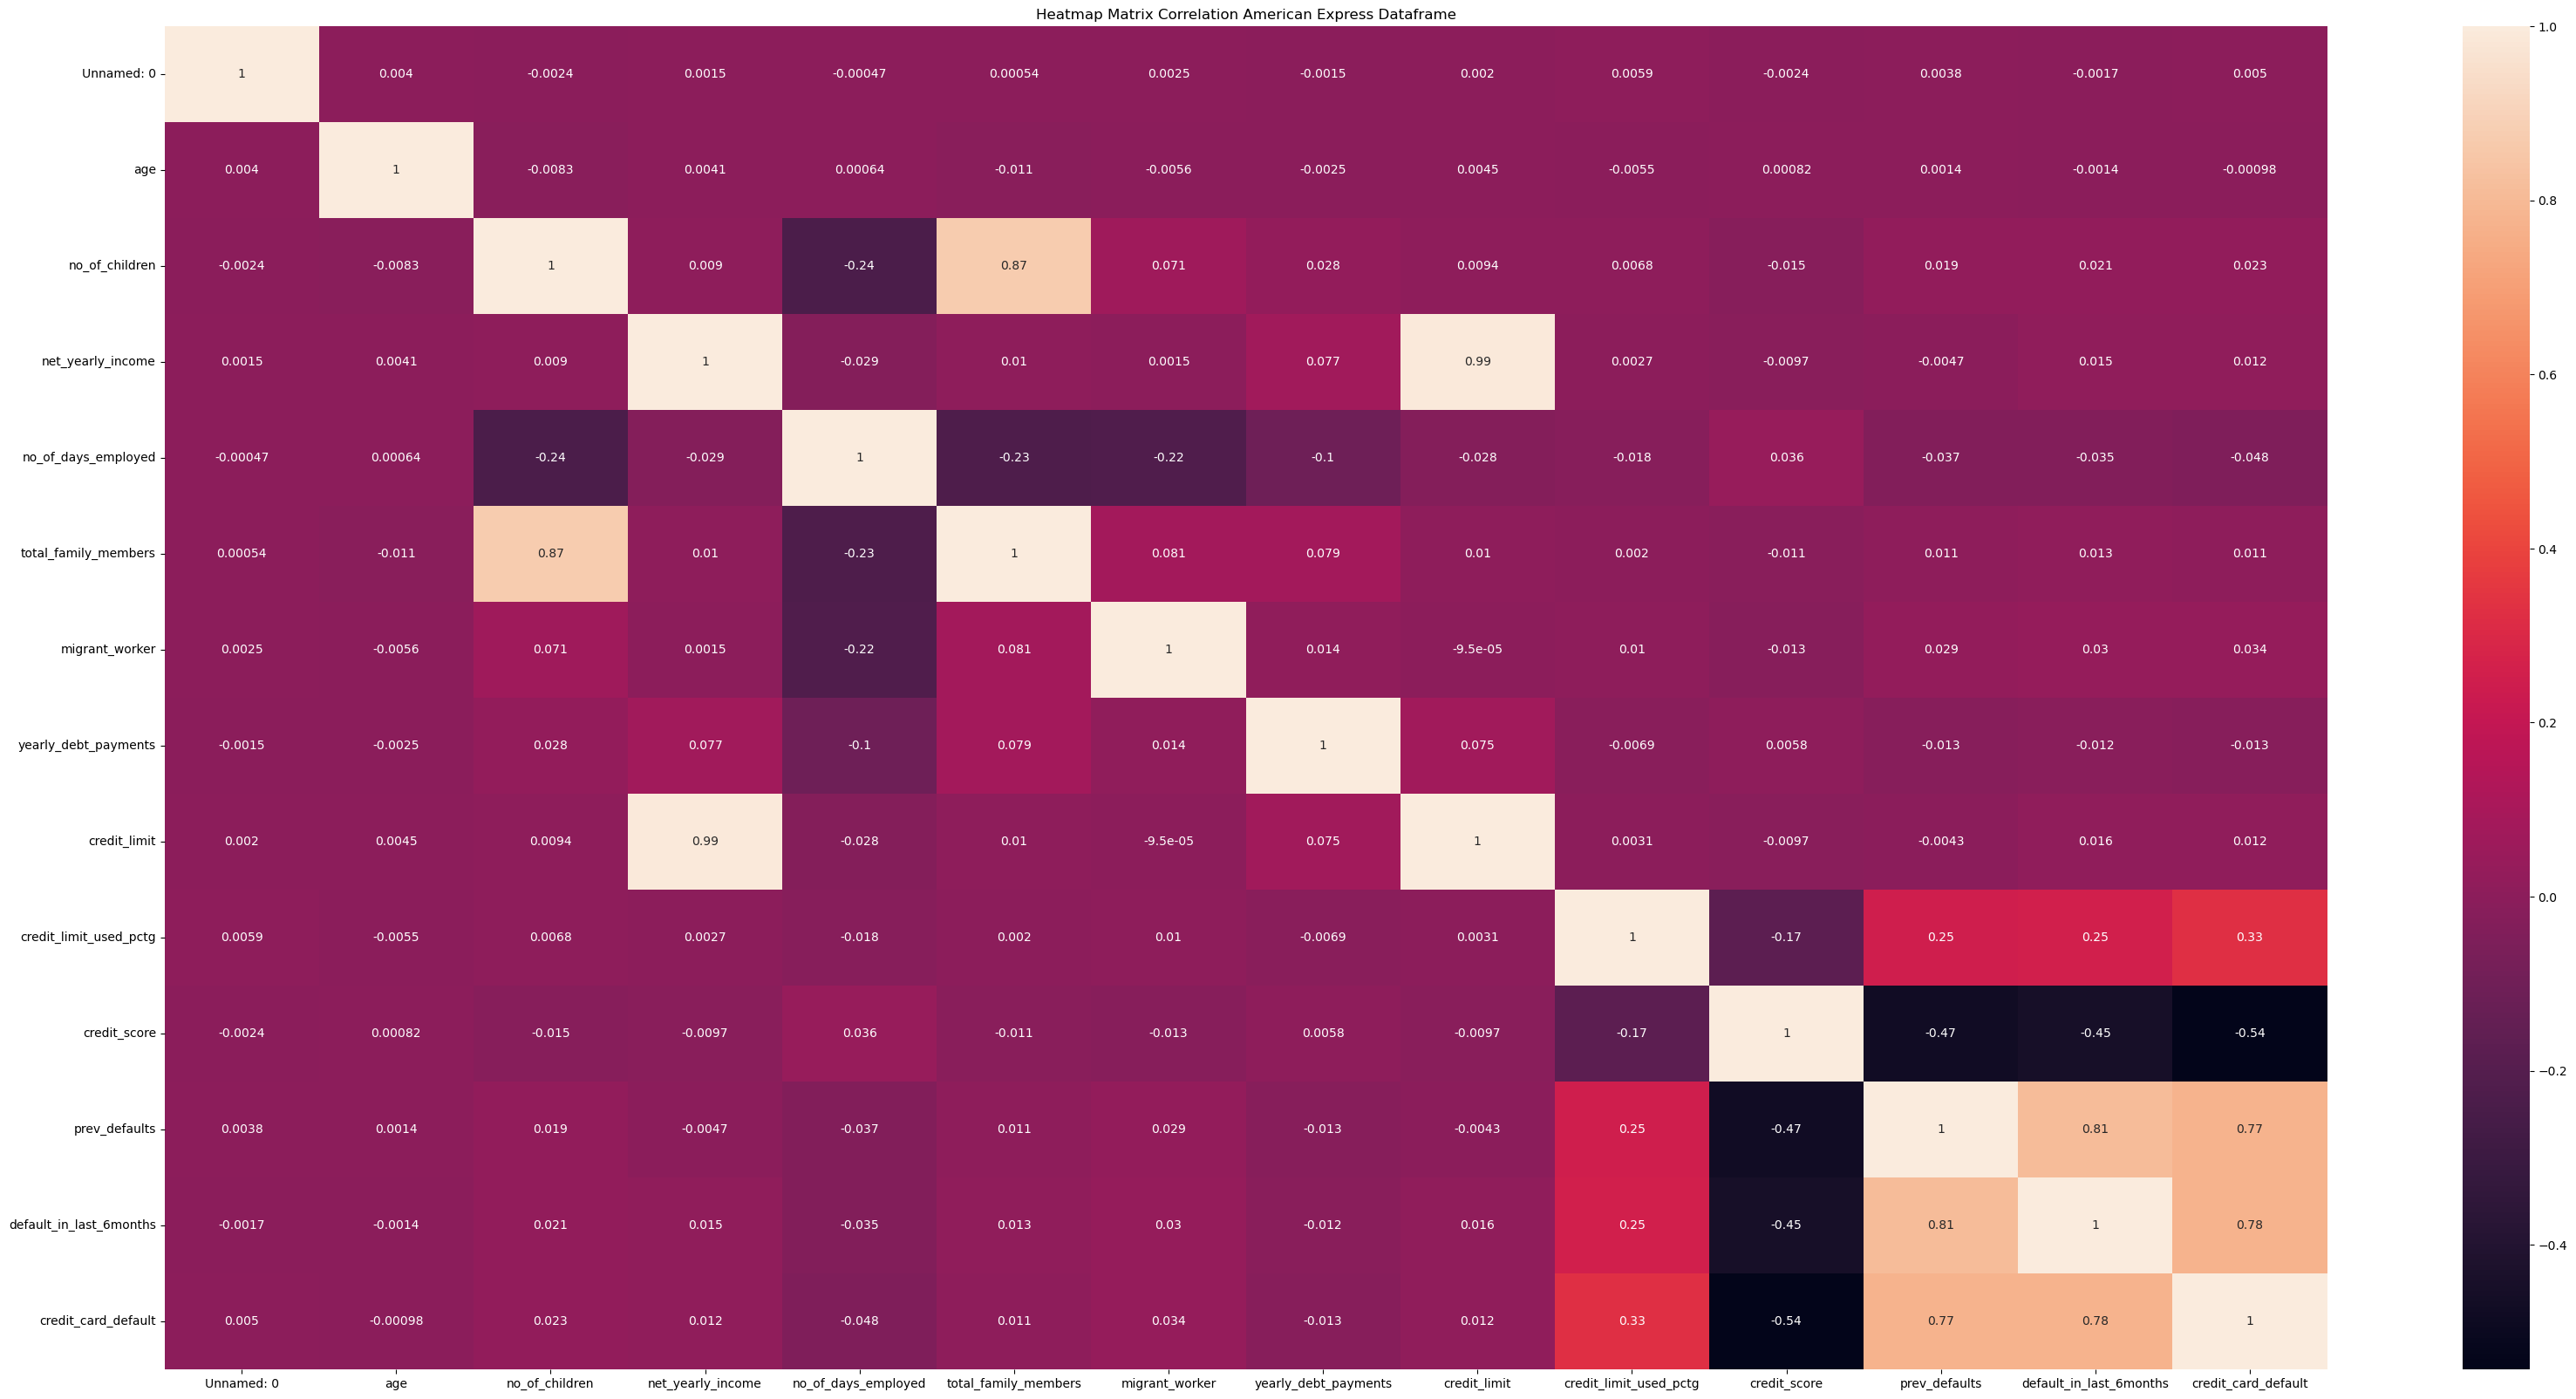

In [43]:
plt.figure(figsize=(40, 20))
sns.heatmap(amex_df_.corr(), annot=True)
plt.title('Heatmap Matrix Correlation American Express Dataframe')

In [44]:
amex_df_.head()

,Unnamed: 0,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used_pctg,credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
